In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier#导入随机森林分类模块
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn import model_selection

In [2]:
data = pd.read_csv(r"C:\Users\zhouy\Desktop\数据科学技术与应用\期末大论文\df_pca.csv")
data.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Income,Time
0,0,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Divorced,No,5933.07,37.49
1,0,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,Divorced,No,10396.98,62.46
2,1,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes,6013.26,36.48


In [25]:
data = data.drop('Gender',axis=1)

In [26]:
T=LabelEncoder() #初始化
data["BusinessTravel"]=T.fit_transform(data["BusinessTravel"])
data["Department"]=T.fit_transform(data["Department"])
data["EducationField"]=T.fit_transform(data["EducationField"])
#data["Gender"]=T.fit_transform(data["Gender"])
data["JobRole"]=T.fit_transform(data["JobRole"])
data["MaritalStatus"]=T.fit_transform(data["MaritalStatus"])
data["OverTime"]=T.fit_transform(data["OverTime"])

In [27]:
data.head(3)

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Income,Time
0,0,2,1,1,4,0,0,5933.07,37.49
1,0,1,1,1,4,0,0,10396.98,62.46
2,1,1,1,1,2,2,1,6013.26,36.48


In [28]:
#数据划分
from sklearn import model_selection
x=data.drop(["Attrition"],axis=1)#删除列
y=data["Attrition"]

x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,
        random_state=10,
        test_size=0.3,
        stratify=data["Attrition"])#保持比例

In [29]:
#构建随机森林模型
from sklearn.ensemble import RandomForestClassifier#导入随机森林分类模块
rf=RandomForestClassifier(n_estimators=20,#基学习器个数
                          random_state=5,
                          class_weight="balanced")# 类别权重平衡
rf.fit(x_train,y_train)#训练模型
y_pred_rf=rf.predict(x_test)

In [30]:
#输出混淆矩阵
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred_rf)#计算混淆矩阵
print(confusion_matrix)

[[272   5]
 [ 44   9]]


In [31]:
#输出评价报告和指标
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       277
           1       0.64      0.17      0.27        53

    accuracy                           0.85       330
   macro avg       0.75      0.58      0.59       330
weighted avg       0.83      0.85      0.81       330



In [32]:
#网格搜索最佳参数
from sklearn.model_selection import GridSearchCV
param_grid=[{"n_estimators":[10,15,20,25],"max_depth":[3,4,5,6,7],'max_features':['auto','log2']}]
grid_search=GridSearchCV(rf,param_grid,scoring="f1")

In [33]:
#输出最佳参数组合
grid_search.fit(x,y)
print("best params: ",grid_search.best_params_)
print("best score: ",grid_search.best_score_)

best params:  {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 15}
best score:  0.508649415101028


In [34]:
#利用最佳参数组合，得到模型最终评价结果
from sklearn.metrics import recall_score,precision_score,f1_score
best_estimator=grid_search.best_estimator_
print("test precision: {:.3f}".format(precision_score(y_test,best_estimator.predict(x_test))))
print("test recall: {:.3f}".format(recall_score(y_test,best_estimator.predict(x_test))))
print("test f1-score: {:.3f}".format(f1_score(y_test,best_estimator.predict(x_test))))

test precision: 0.371
test recall: 0.679
test f1-score: 0.480


In [35]:
#输出最佳参数组合后的测试集预测结果混淆矩阵
print(classification_report(y_test,best_estimator.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       277
           1       0.37      0.68      0.48        53

    accuracy                           0.76       330
   macro avg       0.65      0.73      0.66       330
weighted avg       0.84      0.76      0.79       330



In [13]:
y_pred_best=best_estimator.predict(x_test)

In [14]:
#输出混淆矩阵
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix_best=confusion_matrix(y_test,y_pred_best)#计算混淆矩阵
print(confusion_matrix_best)

[[246  31]
 [ 17  36]]


In [36]:
#各特征重要性
best_estimator.feature_importances_


array([0.01858105, 0.0354728 , 0.01049354, 0.15557884, 0.11067874,
       0.31070913, 0.14867686, 0.20980902])

In [17]:
prob_predict_y_validation

array([[0.25947627, 0.74052373],
       [0.77899505, 0.22100495],
       [0.39181407, 0.60818593],
       [0.78142926, 0.21857074],
       [0.49969126, 0.50030874],
       [0.81952764, 0.18047236],
       [0.7811486 , 0.2188514 ],
       [0.73934391, 0.26065609],
       [0.540134  , 0.459866  ],
       [0.66416532, 0.33583468],
       [0.74597039, 0.25402961],
       [0.83302897, 0.16697103],
       [0.77651093, 0.22348907],
       [0.6030018 , 0.3969982 ],
       [0.79402601, 0.20597399],
       [0.7031714 , 0.2968286 ],
       [0.4750946 , 0.5249054 ],
       [0.64921922, 0.35078078],
       [0.20966325, 0.79033675],
       [0.21739283, 0.78260717],
       [0.78993345, 0.21006655],
       [0.50406513, 0.49593487],
       [0.82329171, 0.17670829],
       [0.74314186, 0.25685814],
       [0.28279015, 0.71720985],
       [0.45596477, 0.54403523],
       [0.88012178, 0.11987822],
       [0.81147421, 0.18852579],
       [0.76495727, 0.23504273],
       [0.76996479, 0.23003521],
       [0.

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc

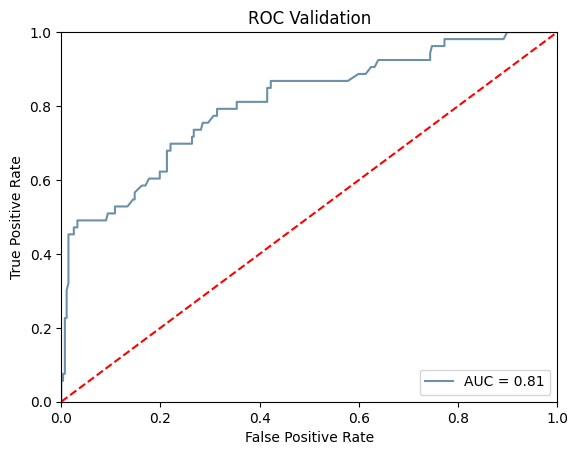

In [37]:
prob_predict_y_validation =best_estimator.predict_proba(x_test)
predictions_validation = prob_predict_y_validation[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions_validation)   
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, '#6b90a7', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
